In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def CARS(a_v, d_v, T_v, t_v):
    dt = 20e-15
    t_arr = np.arange(-1000e-15, 5000e-15, dt)
    T2, tau, a, delom = T_v, t_v, 10**(a_v), 2*np.pi*30e12*d_v
    floor = 1

    the_arr = np.arange(-5*tau, 5*tau, dt)

    Q = [a*np.exp(-tp/T2)*np.trapz(np.heaviside(tp-the_arr,1)*np.exp(the_arr*(1/T2-1j*delom))*np.exp(-4*np.log(2)*the_arr**2/tau**2),the_arr) for tp in t_arr]
    Q = np.abs(Q)**2
    S = [np.trapz(np.exp(-2*np.log(2)*(t_arr-td)**2/tau**2)*Q,t_arr)+floor for td in t_arr]
    return t_arr, S

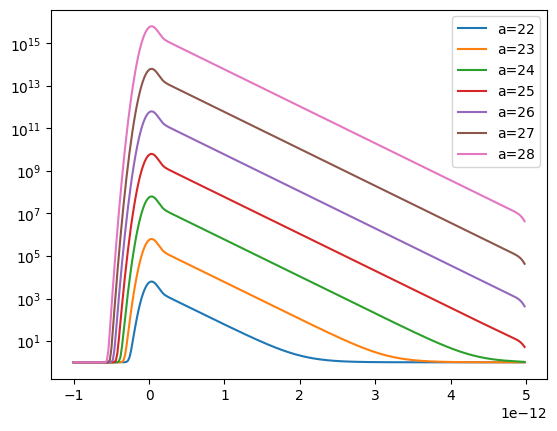

In [92]:
val_arr = [22, 23, 24, 25, 26, 27, 28]
for v in val_arr:
    td, sig = CARS(v, 0.25, 500e-15, 100e-15)
    plt.plot(td, sig, label=f'a={v}')
plt.yscale('log')
plt.legend()

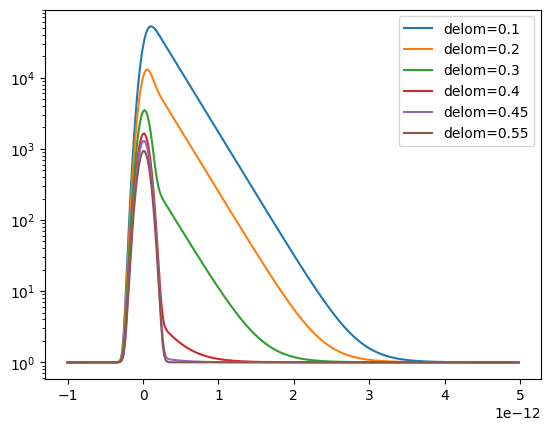

In [93]:
val_arr = [0.1,0.2,0.3,0.4,0.45,0.55]
for v in val_arr:
    td, sig = CARS(22, v, 500e-15, 100e-15)
    plt.plot(td, sig, label=f'delom={v}')
plt.yscale('log')
plt.legend()

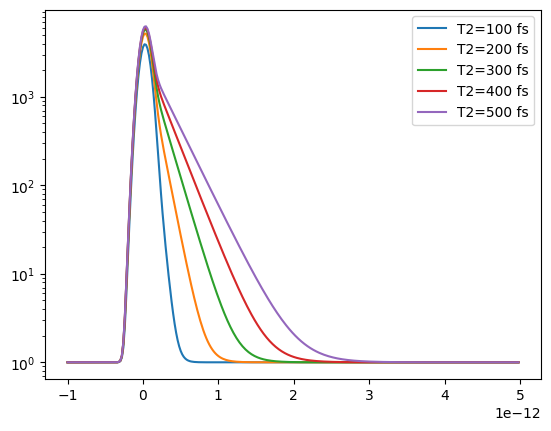

In [94]:
val_arr = np.array([100,200,300,400,500])*1e-15
for v in val_arr:
    td, sig = CARS(22, 0.25, v, 100e-15)
    plt.plot(td, sig, label=f'T2={v*1e15:.0f} fs')
plt.yscale('log')
plt.legend()

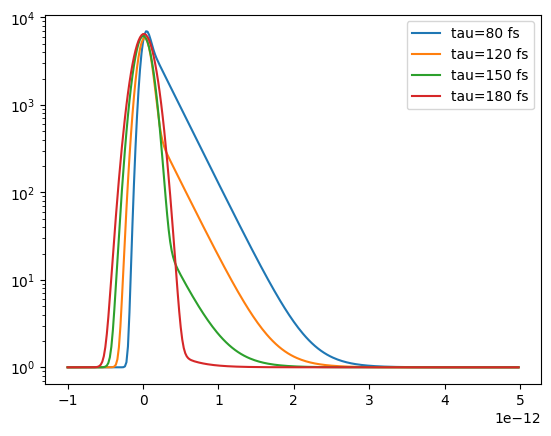

In [95]:
val_arr = np.array([80,120,150,180])*1e-15
for v in val_arr:
    td, sig = CARS(22, 0.25, 500e-15, v)
    plt.plot(td, sig, label=f'tau={v*1e15:.0f} fs')
plt.yscale('log')
plt.legend()